## **RandomForest를 활용한 손글씨 분류 실습**

#### **라이브러리 import**


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV        # 최적의 파라미터 조합을 찾아내기 위함
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

####**데이터 로드 및 확인**

In [ ]:
mnist = fetch_openml('mnist_784')
mnist_data = mnist.data[:10000]
mnist_target = mnist.target[:10000]

print(mnist_data)
print(mnist_data.shape)
print(mnist_target)
print(mnist_target.shape)

      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      pixel10  ...  pixel775  pixel776 

####**학습데이터 / 테스트데이터 나누기**

In [ ]:
# 10000개 dataset만 학습
x_train, x_test, y_train, y_test = train_test_split(mnist_data, mnist_target, test_size=0.2)

# 전체 dataset 학습
# x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

####**Parameter 없이 학습하기**

In [ ]:
dt_clf = tree.DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

dt_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)

dt_pred = dt_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)

accuracy_dt = accuracy_score(y_test, dt_pred)
accuracy_rf = accuracy_score(y_test, rf_pred)

print("의사결정트리 예측 정확도 {0: .4f}".format(accuracy_dt))
print("랜덤 포레스트 예측 정확도 {0: .4f}".format(accuracy_rf))

의사결정트리 예측 정확도  0.7900
랜덤 포레스트 예측 정확도  0.9445


####**특징 중요도 확인**

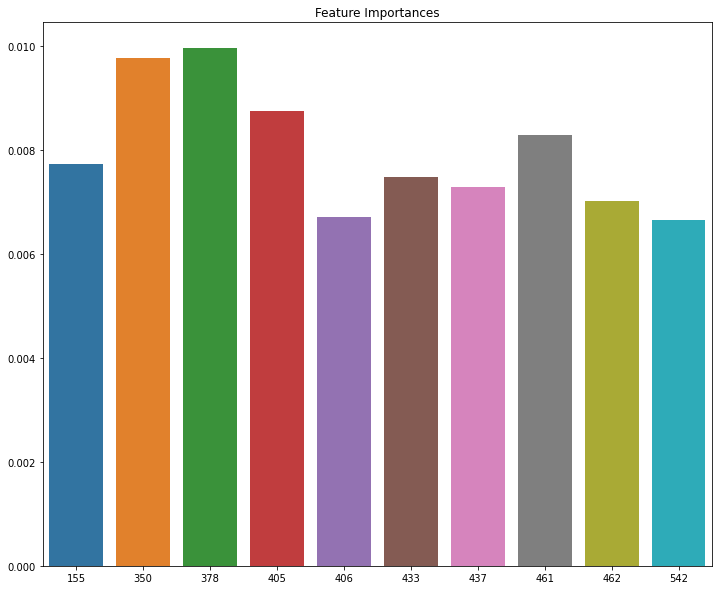

In [ ]:
ft_importance_values = rf_clf.feature_importances_
ft_importances = pd.Series(ft_importance_values)
top10 = ft_importances.sort_values(ascending=False)[:10]  #ascending=False 내림차순
plt.figure(figsize=(12, 10))
plt.title('Feature Importances')
sns.barplot(x=top10.index, y = top10)
plt.show()

####**Parameter 사용하여 학습하기**

In [ ]:
from pandas.core import sorting
# n_estimators : dicision tree의 개수를 각각 100, 110, 120개로 만들어 냄
# min_samples_leaf : 리프 노드가 되기 위한 최소 샘플 데이터 개수
# min_samples_split : 자식 노드를 갖기 위한 최소한의 데이터 개수
# parameter를 잘 활용해야 예측 정확도를 높일 수 있음.

rf_param_grid = {
    'n_estimators' : [100, 110, 120],    
    'min_samples_leaf' : [1, 2, 3],
    'min_samples_split' : [2, 3, 4]
}
rf_clf = RandomForestClassifier(random_state = 0)
grid = GridSearchCV(rf_clf, param_grid=rf_param_grid,
                    scoring= 'accuracy', n_jobs=1)

grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=1,
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 110, 120]},
             scoring='accuracy')

In [ ]:
print('최고 평균 정확도: {0: .4f}'.format(grid.best_score_))
print(grid.best_params_)

최고 평균 정확도:  0.9459
{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
